In [1]:
import os
import cv2
import rasterio
from rasterio.plot import reshape_as_image
import rasterio.mask
from rasterio.features import rasterize
import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping, Point, Polygon
from shapely.ops import cascaded_union
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from geopandas import GeoSeries
from shapely.geometry import Polygon
from rasterio.windows import Window
from rasterio.plot import reshape_as_image


%matplotlib inline

In [2]:
PROJECT_DIR = '/home/mikolaj/github/quantum_geo/warsaw_ws/warsaw_ws_data'

RASTER_PATH = os.path.join(PROJECT_DIR, 'T34JEP_20170101T082332/T34JEP_20170101T082332_TCI.jp2')
TRAIN_POLYGONS_PATH = os.path.join(PROJECT_DIR, 'train-20220726T194123Z-001/train/train.shp')
TEST_POLYGONS_PATH = os.path.join(PROJECT_DIR, 'train-20220726T194123Z-001/test/test.shp')
TRAIN_POLYGONS_CONVERTED = os.path.join(PROJECT_DIR, 'train-20220726T194123Z-001/train/train_test.geojson')
RASTER_MASK_PATH = os.path.join(PROJECT_DIR, 'mask.jp2')
DROP_CSV_PATH = os.path.join(PROJECT_DIR, 'drop.csv')
FRAGMENT_STORAGE = os.path.join(PROJECT_DIR, 'split')
CROPPED_IMAGES = os.path.join(PROJECT_DIR, 'images_cropped_rgb')

In [3]:
# read converted dataframe with geopandas TRAIN_POLYGONS_CONVERTED
train = gpd.read_file(TRAIN_POLYGONS_CONVERTED)

train

,Field_Id,Area,Subregion,Crop_Id_Ne,geometry
0,5,1.322590,3,NaN,"POLYGON ((614428.585 6794207.235, 614453.032 6..."
1,6,0.955864,3,NaN,"POLYGON ((614617.139 6794163.688, 614629.797 6..."
2,10,11.509800,3,NaN,"POLYGON ((614352.457 6794416.784, 614346.004 6..."
3,18,2.697520,3,NaN,"POLYGON ((587079.139 6809196.167, 587169.928 6..."
4,23,4.238030,3,NaN,"POLYGON ((587292.059 6809495.257, 587319.701 6..."
...,...,...,...,...,...
3563,3598,4.660920,7,6,"POLYGON ((541023.437 6854828.753, 541033.054 6..."
3564,3599,4.829750,7,6,"POLYGON ((540644.339 6854746.972, 540664.861 6..."
3565,3600,7.543830,7,6,"POLYGON ((540924.654 6854621.464, 541081.816 6..."
3566,3602,5.144850,6,6,"POLYGON ((543856.043 6857156.769, 544057.982 6..."


In [4]:
# create tiles of each field
src = rasterio.open(RASTER_PATH)
failed = []
os.makedirs(CROPPED_IMAGES, exist_ok=True)

for i, row in tqdm(train.iterrows(), total=len(train)):
    try:
        cropped_image, mask_transform = rasterio.mask.mask(src, [mapping(row.geometry)], crop=True, nodata=0)
        cropped_image = reshape_as_image(cropped_image)
        save_path = os.path.join(CROPPED_IMAGES, f'{row.Field_Id}.jpg')
        cv2.imwrite(save_path, cropped_image)
    except Exception as e:
        failed.append(i)
        print(e)
print("failed: ", len(failed))

  0%|          | 0/3568 [00:00<?, ?it/s]

  1%|          | 42/3568 [00:00<00:09, 354.00it/s]

Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap 

 20%|██        | 717/3568 [00:01<00:07, 398.16it/s]

Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.


 25%|██▍       | 878/3568 [00:02<00:06, 413.71it/s]

Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.


 30%|██▉       | 1069/3568 [00:02<00:04, 540.68it/s]

Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.


 36%|███▌      | 1288/3568 [00:02<00:02, 805.82it/s]

Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap 

 77%|███████▋  | 2743/3568 [00:04<00:00, 1043.05it/s]

Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap 

 87%|████████▋ | 3097/3568 [00:04<00:00, 1110.23it/s]

Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.


 96%|█████████▌| 3423/3568 [00:04<00:00, 1012.59it/s]

Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.


100%|██████████| 3568/3568 [00:05<00:00, 711.89it/s] 

Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
Input shapes do not overlap raster.
failed:  220


In [5]:
print("failed: ", len(failed))

failed:  220


In [6]:
# rasterize works with polygons that are in image coordinate system

def poly_from_utm(polygon, transform):
    poly_pts = []
    
    # make a polygon from multipolygon
    poly = cascaded_union(polygon)
    for i in np.array(poly.exterior.coords):
        
        # transfrom polygon to image crs, using raster meta
        poly_pts.append(~transform * tuple(i))
        
    # make a shapely Polygon object
    new_poly = Polygon(poly_pts)
    return new_poly

In [7]:
# creating binary mask for field/not_filed segmentation.
# collect shapes via checking geom type and applying function
poly_shp = []
transform = src.transform
print(transform)

for i, row in tqdm(train.iterrows(), total=len(train)):
    if row.geometry.geom_type == 'Polygon':
        poly_shp.append(poly_from_utm(row.geometry, transform))
    else:
        for p in row.geometry:
            poly_shp.append(poly_from_utm(p, transform))


| 10.00, 0.00, 499980.00|
| 0.00,-10.00, 6900040.00|
| 0.00, 0.00, 1.00|


  0%|          | 0/3568 [00:00<?, ?it/s]/tmp/ipykernel_143552/2017575073.py:7: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = cascaded_union(polygon)
 19%|█▉        | 689/3568 [00:00<00:00, 6879.54it/s]/tmp/ipykernel_143552/3340298559.py:11: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for p in row.geometry:
100%|██████████| 3568/3568 [00:00<00:00, 7391.34it/s]


In [8]:
# rasterize mask mask
bin_mask = rasterize(shapes=poly_shp, out_shape=src.shape)

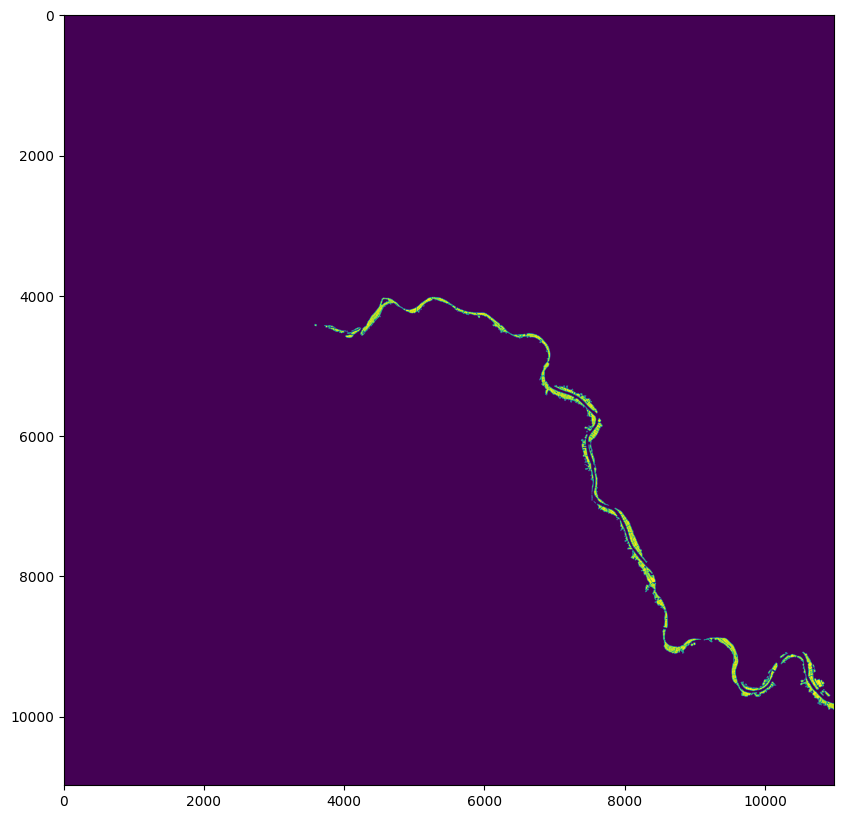

In [9]:
# plotting the mask
plt.figure(figsize=(10, 10))
plt.imshow(bin_mask)


In [16]:
# save mask to the disk with metadata from the original raster
with rasterio.open(RASTER_PATH) as src:
    meta = src.meta.copy()
    meta.update({"count":1})
    with rasterio.open(RASTER_MASK_PATH, 'w', **meta) as dst:
        dst.write(bin_mask, 1)

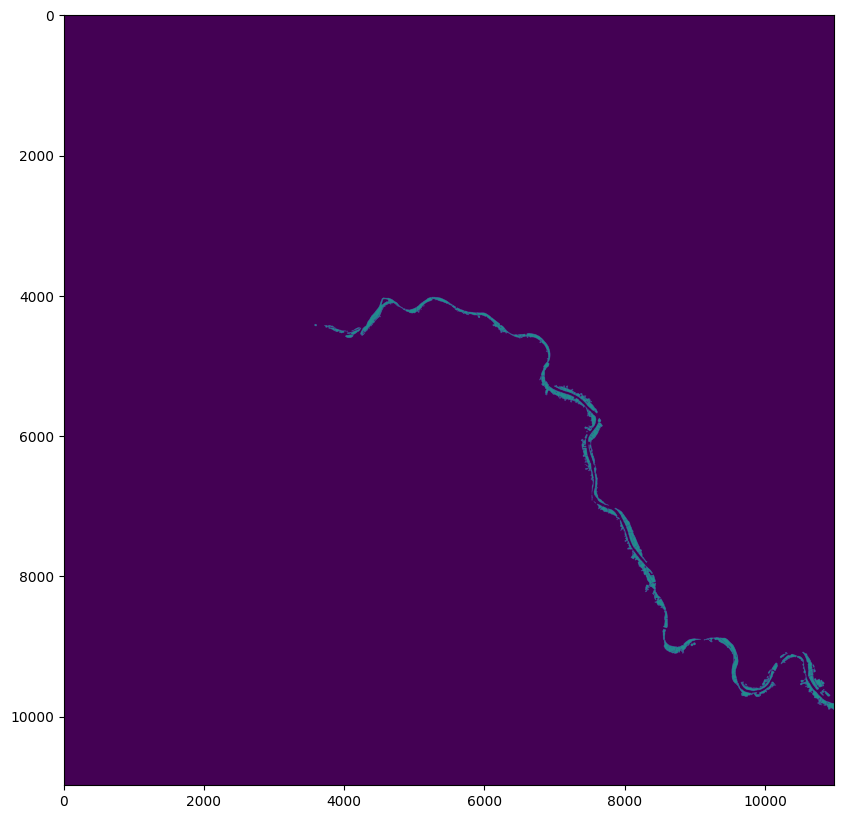

In [17]:
# read from disk and plot to check
with rasterio.open(RASTER_MASK_PATH) as src:
    mask = src.read(1)
    plt.figure(figsize=(10, 10))
    plt.imshow(mask)

In [18]:
def split_image(image_path, save_path, width, height):
    
    img_names = []
    
    if not os.path.exists(save_path):
        os.makedirs(save_path, exist_ok=True)
        print('Data directory created.')

    os.makedirs(f'{save_path}/images', exist_ok=True)
    with rasterio.open(image_path, "r") as src:
        for j in tqdm(range(0, src.height // height)):
            for i in range(0, src.width // width):
                raster_window = src.read(
                    window=Window(i * width, j * height, width, height)
                )
                image_array = reshape_as_image(raster_window)[:, :, :3]
                if np.count_nonzero(image_array) > image_array.size * 0.9:
                    filename_w_ext = os.path.basename(image_path)
                    filename, _ = os.path.splitext(filename_w_ext)
                    image_format = 'png'
                    piece_name = f'{filename}_{j}_{i}.{image_format}'

                    image_array = reshape_as_image(raster_window)
                    img_name = f'{save_path}/images/{piece_name}'
                    img_names.append(img_name)
                    cv2.imwrite(img_name, image_array)

    return img_names

In [132]:
#split mask
def split_mask(image_path, save_path, width, height):
    
    mask_names = []
    drop_list = []
    non_empty = 0
    
    if not os.path.exists(save_path):
        os.makedirs(save_path, exist_ok=True)
        print('Data directory created.')

    os.makedirs(f'{save_path}/masks', exist_ok=True)
    with rasterio.open(image_path) as src:
        for j in tqdm(range(0, src.height // height)):
            for i in range(0, src.width // width):
                raster_window = src.read(window=Window(i * width, j * height, width, height))
                image_array = reshape_as_image(raster_window)
                filename_w_ext = os.path.basename(image_path)
                filename, _ = os.path.splitext(filename_w_ext)
                piece_name = f'{filename}_{j}_{i}.png'

                image_array = reshape_as_image(raster_window)
                # add the code here to subsample 10% of images to train and add it to drop_list
                if np.sum(image_array) == 0:
                    if np.random.rand() > 0.1:
                        drop_list.append(PROJECT_DIR+piece_name)
                        continue
                else:
                    non_empty += 1
                
                mask_name = f'{save_path}/masks/{piece_name}'
                mask_names.append(mask_name)
                image_array[image_array>1] = 1
                cv2.imwrite(mask_name, image_array)

    return mask_names, drop_list

In [126]:
image_names = split_image(RASTER_PATH, FRAGMENT_STORAGE, 256, 256)

100%|██████████| 42/42 [00:40<00:00,  1.04it/s]


In [133]:
mask_names, drop_list = split_mask(RASTER_MASK_PATH, FRAGMENT_STORAGE, 256, 256)

100%|██████████| 42/42 [00:01<00:00, 35.35it/s]


In [134]:
drop_list_df = pd.DataFrame()
drop_list_df['images_to_drop'] = drop_list
drop_list_df.to_csv(DROP_CSV_PATH, index=False)

drop_list_df

,images_to_drop
0,/home/mikolaj/github/quantum_geo/warsaw_ws/war...
1,/home/mikolaj/github/quantum_geo/warsaw_ws/war...
2,/home/mikolaj/github/quantum_geo/warsaw_ws/war...
3,/home/mikolaj/github/quantum_geo/warsaw_ws/war...
4,/home/mikolaj/github/quantum_geo/warsaw_ws/war...
...,...
1507,/home/mikolaj/github/quantum_geo/warsaw_ws/war...
1508,/home/mikolaj/github/quantum_geo/warsaw_ws/war...
1509,/home/mikolaj/github/quantum_geo/warsaw_ws/war...
1510,/home/mikolaj/github/quantum_geo/warsaw_ws/war...


In [117]:
# create by removing masks 
used_image_names = [img_name for img_name in image_names if img_name.replace("images/T34JEP_20170101T082332_TCI", "masks/mask") not in drop_list]
used_masks = [mask_names[i] for i in range(0, len(mask_names)) if mask_names[i] not in drop_list]

In [118]:
used_image_names[:5]

['/home/mikolaj/github/quantum_geo/warsaw_ws/warsaw_ws_data/split/images/T34JEP_20170101T082332_TCI_0_0.png',
 '/home/mikolaj/github/quantum_geo/warsaw_ws/warsaw_ws_data/split/images/T34JEP_20170101T082332_TCI_0_1.png',
 '/home/mikolaj/github/quantum_geo/warsaw_ws/warsaw_ws_data/split/images/T34JEP_20170101T082332_TCI_0_2.png',
 '/home/mikolaj/github/quantum_geo/warsaw_ws/warsaw_ws_data/split/images/T34JEP_20170101T082332_TCI_0_3.png',
 '/home/mikolaj/github/quantum_geo/warsaw_ws/warsaw_ws_data/split/images/T34JEP_20170101T082332_TCI_0_4.png']

In [119]:
len(used_image_names)

1764

In [124]:
# read and plot tile
import random

# find nonempty masks
nonempty_mask_idx = []
for i, mask in enumerate(used_masks):
    if np.count_nonzero(cv2.imread(mask)) > 0:
        nonempty_mask_idx.append(i)

i = 100 # 727
raster_image = cv2.imread(used_image_names[i])
mask_image = cv2.imread(used_masks[i])

f, axarr = plt.subplots(1, 2)
print(f'Image and mask: {i}')
f.set_size_inches(15, 15)
axarr[0].imshow(raster_image)
axarr[1].imshow(mask_image*255, 'gray')

IndexError: list index out of range